<a href="https://colab.research.google.com/github/andrealvzvz/Apanistas/blob/main/apanistas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
%pip install funpymodeling

  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.6/204.6 kB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 20.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.0/99.0 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.6/62.6 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.7/5.7 MB 73.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 123.4/123.4 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.9/468.9 kB 26.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.5/93.5 kB 6.5 MB/s eta 0:00:00
Using cached jedi-0.19.1-py2.py3-none-any.whl (1.6 MB)
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.13.1
    Uninstalling seaborn-0.13.1:
      Successfully uninstalled seaborn-0.13.1


In [3]:
import pandas as pd
import numpy as np
import statistics as stats # estadística
import matplotlib.pyplot as plt
from funpymodeling.exploratory import freq_tbl
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.arima.model import ARIMAResults
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.statespace.sarimax import SARIMAX
import statsmodels.api as sm
%matplotlib inline


In [4]:
#levantamos la data con pandas
amsterdam = pd.read_csv("amsterdam.csv")
chicago = pd.read_csv("chicago.csv")



In [8]:
#datos nulos
amsterdam.isnull().sum()

,0
id,0
listing_url,0
scrape_id,0
last_scraped,0
source,0
...,...
calculated_host_listings_count,0
calculated_host_listings_count_entire_homes,0
calculated_host_listings_count_private_rooms,0
calculated_host_listings_count_shared_rooms,0


In [9]:
#limpieza de columnas con datos faltantes
amsterdam_nulls_cuanti = amsterdam.iloc[:,[9,13]]
amsterdam_nulls_cuanti

,host_id,host_location
0,1141485,"Amsterdam, Netherlands"
1,1582128,"Amsterdam, Netherlands"
2,1141485,"Amsterdam, Netherlands"
3,1141485,"Amsterdam, Netherlands"
4,1600010,"Amsterdam, Netherlands"
...,...,...
9305,132308426,"Dosson, Italy"
9306,266555953,Netherlands
9307,59631682,Netherlands
9308,560171917,NaN


In [11]:
#limpieza usando media
#amsterdam_nulls_cuanti_limpio = amsterdam_nulls_cuanti.fillna(amsterdam_nulls_cuanti.mean())
#limpieza usando media
amsterdam_nulls_cuanti_limpio = amsterdam_nulls_cuanti.fillna(amsterdam_nulls_cuanti.mean(numeric_only=True)) # add numeric_only=True to only calculate the mean of numeric columns
amsterdam_nulls_cuanti_limpio


,host_id,host_location
0,1141485,"Amsterdam, Netherlands"
1,1582128,"Amsterdam, Netherlands"
2,1141485,"Amsterdam, Netherlands"
3,1141485,"Amsterdam, Netherlands"
4,1600010,"Amsterdam, Netherlands"
...,...,...
9305,132308426,"Dosson, Italy"
9306,266555953,Netherlands
9307,59631682,Netherlands
9308,560171917,NaN


In [12]:
amsterdam_nulls_cuali = amsterdam.iloc[:,[12,17]]
amsterdam_nulls_cuali

,host_since,host_acceptance_rate
0,2011-09-11,NaN
1,2012-01-08,86%
2,2011-09-11,NaN
3,2011-09-11,NaN
4,2012-01-12,88%
...,...,...
9305,2017-05-28,NaN
9306,2019-06-05,NaN
9307,2016-02-20,NaN
9308,2024-02-03,NaN


In [13]:
#limpieza usando ffill
amsterdam_nulls_cuali_limpio = amsterdam_nulls_cuali.fillna(method='ffill')
amsterdam_nulls_cuali_limpio

<ipython-input-13-c1db3afc7159>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  amsterdam_nulls_cuali_limpio = amsterdam_nulls_cuali.fillna(method='ffill')


,host_since,host_acceptance_rate
0,2011-09-11,NaN
1,2012-01-08,86%
2,2011-09-11,86%
3,2011-09-11,86%
4,2012-01-12,88%
...,...,...
9305,2017-05-28,0%
9306,2019-06-05,0%
9307,2016-02-20,0%
9308,2024-02-03,0%


In [14]:
#union de data frame original con limpios
amsterdam_limpio = pd.concat([amsterdam,amsterdam_nulls_cuanti_limpio,amsterdam_nulls_cuali_limpio],axis=1)
amsterdam_limpio

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,host_id,host_location,host_since,host_acceptance_rate
0,306852,https://www.airbnb.com/rooms/306852,20240610194833,2024-06-11,city scrape,"SunShine, A Sunny Amsterdam Center Special",NaN,NaN,https://a0.muscache.com/pictures/3240023/0081b...,1141485,...,f,3,2,1,0,0.22,1141485,"Amsterdam, Netherlands",2011-09-11,NaN
1,307497,https://www.airbnb.com/rooms/307497,20240610194833,2024-06-11,previous scrape,Historical sailing ship Amsterdam,Welcome on board of our historical sailing shi...,Amsterdam (Pontsteiger) - From the northern Po...,https://a0.muscache.com/pictures/miso/Hosting-...,1582128,...,f,2,2,0,0,0.72,1582128,"Amsterdam, Netherlands",2012-01-08,86%
2,307621,https://www.airbnb.com/rooms/307621,20240610194833,2024-06-11,city scrape,"SunBird, Sunny Apt in Quiet Street",Sunflower guarantees you a pleasant stay in Am...,NaN,https://a0.muscache.com/pictures/3276065/800ad...,1141485,...,f,3,2,1,0,0.04,1141485,"Amsterdam, Netherlands",2011-09-11,86%
3,308028,https://www.airbnb.com/rooms/308028,20240610194833,2024-06-11,previous scrape,"SunFlower, A Sunny B&B",NaN,NaN,https://a0.muscache.com/pictures/3275572/eb834...,1141485,...,f,3,2,1,0,0.29,1141485,"Amsterdam, Netherlands",2011-09-11,86%
4,311124,https://www.airbnb.com/rooms/311124,20240610194833,2024-06-11,previous scrape,*historic centre* *bright* *canal view* *jordaan*,( Please contact us first before making a book...,Perfect location in the lively centre. Neverth...,https://a0.muscache.com/pictures/hosting/Hosti...,1600010,...,f,1,1,0,0,0.63,1600010,"Amsterdam, Netherlands",2012-01-12,88%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9305,1175116824303726032,https://www.airbnb.com/rooms/1175116824303726032,20240610194833,2024-06-11,city scrape,bright & cozy space next to park,Discover the canal city of Amsterdam in an aut...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,132308426,...,f,1,1,0,0,NaN,132308426,"Dosson, Italy",2017-05-28,0%
9306,1175204029544779164,https://www.airbnb.com/rooms/1175204029544779164,20240610194833,2024-06-11,city scrape,Modern appartement in Oud-West,It is a cozy apartment with lots of light in t...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,266555953,...,f,1,1,0,0,NaN,266555953,Netherlands,2019-06-05,0%
9307,1175209350067731162,https://www.airbnb.com/rooms/1175209350067731162,20240610194833,2024-06-10,city scrape,1BA in amsterdam noord,This apartment is perfect for a couple that lo...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,59631682,...,f,1,1,0,0,NaN,59631682,Netherlands,2016-02-20,0%
9308,1175238277305794588,https://www.airbnb.com/rooms/1175238277305794588,20240610194833,2024-06-11,city scrape,Canal view flat (roof terrace),Located in the historical city center with a c...,NaN,https://a0.muscache.com/pictures/hosting/Hosti...,560171917,...,t,1,1,0,0,NaN,560171917,NaN,2024-02-03,0%


In [15]:
#eliminamos neighbourhood_group debido a que esta totalmente vacio
amsterdam_limpio = amsterdam_limpio.drop(["neighbourhood_group"],axis=1)
amsterdam_limpio

KeyError: "['neighbourhood_group'] not found in axis"

In [ ]:
#eliminamos las columnas originales con valores nulos
amsterdam_limpio = amsterdam_limpio.dropna()
amsterdam_limpio

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,...,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,price,reviews_per_month,last_review,license
0,306852,"SunShine, A Sunny Amsterdam Center Special",1141485,Gisèle And Simon,Centrum-Oost,52.359310,4.898440,Entire home/apt,200.0,4,...,2023-04-01,0.22,3,0,0,0363 33C3 B936 3911 FC42,200.0,0.22,2023-04-01,0363 33C3 B936 3911 FC42
2,307621,"SunBird, Sunny Apt in Quiet Street",1141485,Gisèle And Simon,Centrum-Oost,52.358710,4.896160,Entire home/apt,155.0,3,...,2023-03-27,0.04,3,0,0,0363 33C3 B936 3911 FC42,155.0,0.04,2023-03-27,0363 33C3 B936 3911 FC42
5,742160,Historical sailing ship in the center of Amste...,1582128,Jorn,Centrum-Oost,52.368660,4.920710,Entire home/apt,1600.0,2,...,2024-04-28,0.99,2,211,14,Exempt,1600.0,0.99,2024-04-28,Exempt
6,744659,Private luxury B&B near Amstel,3518386,Kristel,Oud-Oost,52.356590,4.908270,Private room,125.0,2,...,2024-05-20,2.07,1,239,59,0363 C453 AB43 D5F5 6DAC,125.0,2.07,2024-05-20,0363 C453 AB43 D5F5 6DAC
8,2818,Quiet Garden View Room & Super Fast Wi-Fi,3159,Daniel,Oostelijk Havengebied - Indische Buurt,52.364350,4.943580,Private room,82.0,3,...,2024-06-05,2.04,1,41,41,0363 5F3A 5684 6750 D14D,82.0,2.04,2024-06-05,0363 5F3A 5684 6750 D14D
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9230,1163846018309664061,Apartment with stunning garden,77665918,Wietse,Oud-Oost,52.359989,4.927881,Entire home/apt,400.0,2,...,2024-05-31,2.00,1,20,2,0363 A5DB 677D 1402 6292,400.0,2.00,2024-05-31,0363 A5DB 677D 1402 6292
9234,1164506634079345092,Charmante loft,39559703,Matthias,Oud-Oost,52.357027,4.907012,Entire home/apt,250.0,2,...,2024-06-09,2.00,1,18,2,0363 8609 55F0 108D 0EAE,250.0,2.00,2024-06-09,0363 8609 55F0 108D 0EAE
9248,1166618220683555287,Cosy apartment near the city centre,503504639,Awien,Bos en Lommer,52.378732,4.855803,Entire home/apt,220.0,1,...,2024-06-10,1.00,1,79,1,0363 8C9E 0EBB 1CB5 087D,220.0,1.00,2024-06-10,0363 8C9E 0EBB 1CB5 087D
9249,1166649319420227932,Lovely apartment in De Pijp,62672533,Nikol,De Pijp - Rivierenbuurt,52.351390,4.893870,Entire home/apt,184.0,1,...,2024-06-06,1.00,4,14,1,0363 6A85 2977 DAF3 3FF6,184.0,1.00,2024-06-06,0363 6A85 2977 DAF3 3FF6


In [ ]:
amsterdam_limpio.isnull().sum()

,0
id,0
name,0
host_id,0
host_name,0
neighbourhood,0
latitude,0
longitude,0
room_type,0
price,0
minimum_nights,0


In [ ]:
#guardamos el archivo limpio
amsterdam_limpio.to_csv("amsterdam_limpio.csv")

In [ ]:
#datos nulos
chicago.isnull().sum()

,0
id,0
name,0
host_id,0
host_name,0
neighbourhood_group,7952
neighbourhood,0
latitude,0
longitude,0
room_type,0
price,354


In [ ]:
#limpieza de columnas con datos faltantes
chicago_nulls_cuanti = chicago.iloc[:,[9,13]]
chicago_nulls_cuanti

,price,reviews_per_month
0,125.0,2.10
1,104.0,2.89
2,188.0,0.75
3,339.0,0.15
4,214.0,1.27
...,...,...
7947,132.0,NaN
7948,373.0,NaN
7949,147.0,NaN
7950,334.0,NaN


In [ ]:
#limpieza usando mediana
chicago_nulls_cuanti_limpio = chicago_nulls_cuanti.fillna(chicago_nulls_cuanti.median())
chicago_nulls_cuanti_limpio

,price,reviews_per_month
0,125.0,2.10
1,104.0,2.89
2,188.0,0.75
3,339.0,0.15
4,214.0,1.27
...,...,...
7947,132.0,1.58
7948,373.0,1.58
7949,147.0,1.58
7950,334.0,1.58


In [ ]:
chicago_nulls_cuali = chicago.iloc[:,[12,17]]
chicago_nulls_cuali

,last_review,license
0,2024-06-08,R17000015609
1,2024-06-01,R24000114046
2,2024-06-16,2209984
3,2024-05-27,R20000055258
4,2024-06-18,R24000113825
...,...,...
7947,NaN,R23000111749
7948,NaN,R24000117695
7949,NaN,NaN
7950,NaN,NaN


In [ ]:
#limpieza usando ffill
chicago_nulls_cuali_limpio = chicago_nulls_cuali.fillna(method='ffill')
chicago_nulls_cuali_limpio

<ipython-input-56-f2e6773f467d>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  chicago_nulls_cuali_limpio = chicago_nulls_cuali.fillna(method='ffill')


,last_review,license
0,2024-06-08,R17000015609
1,2024-06-01,R24000114046
2,2024-06-16,2209984
3,2024-05-27,R20000055258
4,2024-06-18,R24000113825
...,...,...
7947,2024-06-16,R23000111749
7948,2024-06-16,R24000117695
7949,2024-06-16,R24000117695
7950,2024-06-16,R24000117695


In [ ]:
#union del dataframe original con las limpias
chicago_limpio = pd.concat([chicago,chicago_nulls_cuanti_limpio,chicago_nulls_cuali_limpio],axis=1)
chicago_limpio

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,price,reviews_per_month,last_review,license
0,2384,Hyde Park - Walk to The University of Chicago,2613,Rebecca,NaN,Hyde Park,41.787900,-87.587800,Private room,125.0,...,2024-06-08,2.10,1,328,23,R17000015609,125.0,2.10,2024-06-08,R17000015609
1,7126,Tiny Studio Apartment 94 Walk Score,17928,Sarah,NaN,West Town,41.901660,-87.680210,Entire home/apt,104.0,...,2024-06-01,2.89,1,297,32,R24000114046,104.0,2.89,2024-06-01,R24000114046
2,10945,The Biddle House (#1),33004,At Home Inn,NaN,Lincoln Park,41.911960,-87.639810,Entire home/apt,188.0,...,2024-06-16,0.75,5,196,26,2209984,188.0,0.75,2024-06-16,2209984
3,12140,Lincoln Park Guest House,46734,Shay And Robert,NaN,Lincoln Park,41.923570,-87.649470,Private room,339.0,...,2024-05-27,0.15,1,151,1,R20000055258,339.0,0.15,2024-05-27,R20000055258
4,28749,Quirky Bucktown Loft w/ Parking NO PARTIES,27506,Lauri,NaN,Logan Square,41.921370,-87.679330,Entire home/apt,214.0,...,2024-06-18,1.27,1,13,33,R24000113825,214.0,1.27,2024-06-18,R24000113825
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7947,1182687948699882888,Central spacious one bedroom,23612069,Tj,NaN,Lake View,41.936014,-87.667628,Entire home/apt,132.0,...,NaN,NaN,18,236,0,R23000111749,132.0,1.58,2024-06-16,R23000111749
7948,1182716288044674640,Gorgeous 3 bedroom in Tri-Taylor,19002255,Camila And Ken,NaN,Near West Side,41.869300,-87.683760,Entire home/apt,373.0,...,NaN,NaN,2,180,0,R24000117695,373.0,1.58,2024-06-16,R24000117695
7949,1182824986028953093,MTR~Pool~Sauna~Gym~Wholefoods Attached,535948736,Santonio,NaN,Near North Side,41.892167,-87.621202,Entire home/apt,147.0,...,NaN,NaN,2,184,0,NaN,147.0,1.58,2024-06-16,R24000117695
7950,1183388043392796826,Standard King Room Near Wendt Playlot Park CHI,446820235,LuxurybookingsFZE,NaN,Lake View,41.943097,-87.646402,Entire home/apt,334.0,...,NaN,NaN,108,363,0,NaN,334.0,1.58,2024-06-16,R24000117695


In [ ]:
#eliminamos neighbourhood_group debido a que esta totalmente vacio
chicago_limpio = chicago_limpio.drop(["neighbourhood_group"],axis=1)
chicago_limpio

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,...,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,price,reviews_per_month,last_review,license
0,2384,Hyde Park - Walk to The University of Chicago,2613,Rebecca,Hyde Park,41.787900,-87.587800,Private room,125.0,3,...,2024-06-08,2.10,1,328,23,R17000015609,125.0,2.10,2024-06-08,R17000015609
1,7126,Tiny Studio Apartment 94 Walk Score,17928,Sarah,West Town,41.901660,-87.680210,Entire home/apt,104.0,2,...,2024-06-01,2.89,1,297,32,R24000114046,104.0,2.89,2024-06-01,R24000114046
2,10945,The Biddle House (#1),33004,At Home Inn,Lincoln Park,41.911960,-87.639810,Entire home/apt,188.0,4,...,2024-06-16,0.75,5,196,26,2209984,188.0,0.75,2024-06-16,2209984
3,12140,Lincoln Park Guest House,46734,Shay And Robert,Lincoln Park,41.923570,-87.649470,Private room,339.0,2,...,2024-05-27,0.15,1,151,1,R20000055258,339.0,0.15,2024-05-27,R20000055258
4,28749,Quirky Bucktown Loft w/ Parking NO PARTIES,27506,Lauri,Logan Square,41.921370,-87.679330,Entire home/apt,214.0,2,...,2024-06-18,1.27,1,13,33,R24000113825,214.0,1.27,2024-06-18,R24000113825
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7947,1182687948699882888,Central spacious one bedroom,23612069,Tj,Lake View,41.936014,-87.667628,Entire home/apt,132.0,1,...,NaN,NaN,18,236,0,R23000111749,132.0,1.58,2024-06-16,R23000111749
7948,1182716288044674640,Gorgeous 3 bedroom in Tri-Taylor,19002255,Camila And Ken,Near West Side,41.869300,-87.683760,Entire home/apt,373.0,1,...,NaN,NaN,2,180,0,R24000117695,373.0,1.58,2024-06-16,R24000117695
7949,1182824986028953093,MTR~Pool~Sauna~Gym~Wholefoods Attached,535948736,Santonio,Near North Side,41.892167,-87.621202,Entire home/apt,147.0,32,...,NaN,NaN,2,184,0,NaN,147.0,1.58,2024-06-16,R24000117695
7950,1183388043392796826,Standard King Room Near Wendt Playlot Park CHI,446820235,LuxurybookingsFZE,Lake View,41.943097,-87.646402,Entire home/apt,334.0,32,...,NaN,NaN,108,363,0,NaN,334.0,1.58,2024-06-16,R24000117695


In [ ]:
#eliminamos las columnas originales con valores nulos
chicago_limpio = chicago_limpio.dropna()
chicago_limpio

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,...,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,price,reviews_per_month,last_review,license
0,2384,Hyde Park - Walk to The University of Chicago,2613,Rebecca,Hyde Park,41.787900,-87.587800,Private room,125.0,3,...,2024-06-08,2.10,1,328,23,R17000015609,125.0,2.10,2024-06-08,R17000015609
1,7126,Tiny Studio Apartment 94 Walk Score,17928,Sarah,West Town,41.901660,-87.680210,Entire home/apt,104.0,2,...,2024-06-01,2.89,1,297,32,R24000114046,104.0,2.89,2024-06-01,R24000114046
2,10945,The Biddle House (#1),33004,At Home Inn,Lincoln Park,41.911960,-87.639810,Entire home/apt,188.0,4,...,2024-06-16,0.75,5,196,26,2209984,188.0,0.75,2024-06-16,2209984
3,12140,Lincoln Park Guest House,46734,Shay And Robert,Lincoln Park,41.923570,-87.649470,Private room,339.0,2,...,2024-05-27,0.15,1,151,1,R20000055258,339.0,0.15,2024-05-27,R20000055258
4,28749,Quirky Bucktown Loft w/ Parking NO PARTIES,27506,Lauri,Logan Square,41.921370,-87.679330,Entire home/apt,214.0,2,...,2024-06-18,1.27,1,13,33,R24000113825,214.0,1.27,2024-06-18,R24000113825
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7877,1172524096585357952,Modern 2BR Apt. | Near Downtown Chicago,581574348,All Bases Covered,East Garfield Park,41.873452,-87.711368,Entire home/apt,150.0,1,...,2024-06-17,1.00,1,266,1,R24000116540,150.0,1.00,2024-06-17,R24000116540
7879,1172609190816850032,Wrigleyville Suites Room 1,545236821,Villa,Lake View,41.949340,-87.658180,Private room,208.0,1,...,2024-06-14,1.00,25,76,1,R24000115024,208.0,1.00,2024-06-14,R24000115024
7882,1173542396433869048,Vintage Arcade Apt with Parking,445766024,Freddy,North Lawndale,41.848310,-87.734190,Entire home/apt,95.0,1,...,2024-06-20,1.00,1,242,1,R24000117798,95.0,1.00,2024-06-20,R24000117798
7886,1173682747622945664,"3BR Luxury Modern Apartment | Pool, & Gym",71423,Anthony,Near North Side,41.897382,-87.638228,Entire home/apt,570.0,3,...,2024-06-16,1.00,2,163,1,R24000117910,570.0,1.00,2024-06-16,R24000117910


In [ ]:
chicago_limpio.isnull().sum()

,0
id,0
name,0
host_id,0
host_name,0
neighbourhood,0
latitude,0
longitude,0
room_type,0
price,0
minimum_nights,0


In [ ]:
#guardamos el dataframe
chicago_limpio.to_csv("chicago_limpio.csv")

***ANALISIS Y GRAFICAS CON BASE DE DATOS LIMPIAS***

In [ ]:
#leer archivos limpios
amsterdam_limpio = pd.read_csv("amsterdam_limpio.csv")
chicago_limpio = pd.read_csv("chicago_limpio.csv")

In [ ]:
table1 = freq_tbl(amsterdam_limpio['name'])
table1

,name,frequency,percentage,cumulative_perc
0,Apartment in Amsterdam,7,0.001351,0.001351
1,Cozy apartment in Amsterdam,6,0.001158,0.002509
2,Appartement in Amsterdam,6,0.001158,0.003667
3,Lovely apartment in Amsterdam,5,0.000965,0.004632
4,"Dubbel kamer, ontbijt is inbegrepen.",4,0.000772,0.005404
...,...,...,...,...
5111,Luxurious apartment In Rembrandrpark,1,0.000193,0.999228
5112,Central loft in De Pijp,1,0.000193,0.999421
5113,Private space 15 minutes from center,1,0.000193,0.999614
5114,"Private accommodation in City Centre, 1st floor",1,0.000193,0.999807


In [ ]:
Filtro= table1[table1['frequency']>4]
Filtro

,name,frequency,percentage,cumulative_perc
0,Apartment in Amsterdam,7,0.001351,0.001351
1,Cozy apartment in Amsterdam,6,0.001158,0.002509
2,Appartement in Amsterdam,6,0.001158,0.003667
3,Lovely apartment in Amsterdam,5,0.000965,0.004632


In [ ]:
Filtro.drop(['percentage','cumulative_perc'], axis=1)

,name,frequency
0,Apartment in Amsterdam,7
1,Cozy apartment in Amsterdam,6
2,Appartement in Amsterdam,6
3,Lovely apartment in Amsterdam,5


In [ ]:
# Filter Chicago dataframe
table1_chicago = freq_tbl(chicago_limpio['name'])
Filtro_chicago = table1_chicago[table1_chicago['frequency']>8]

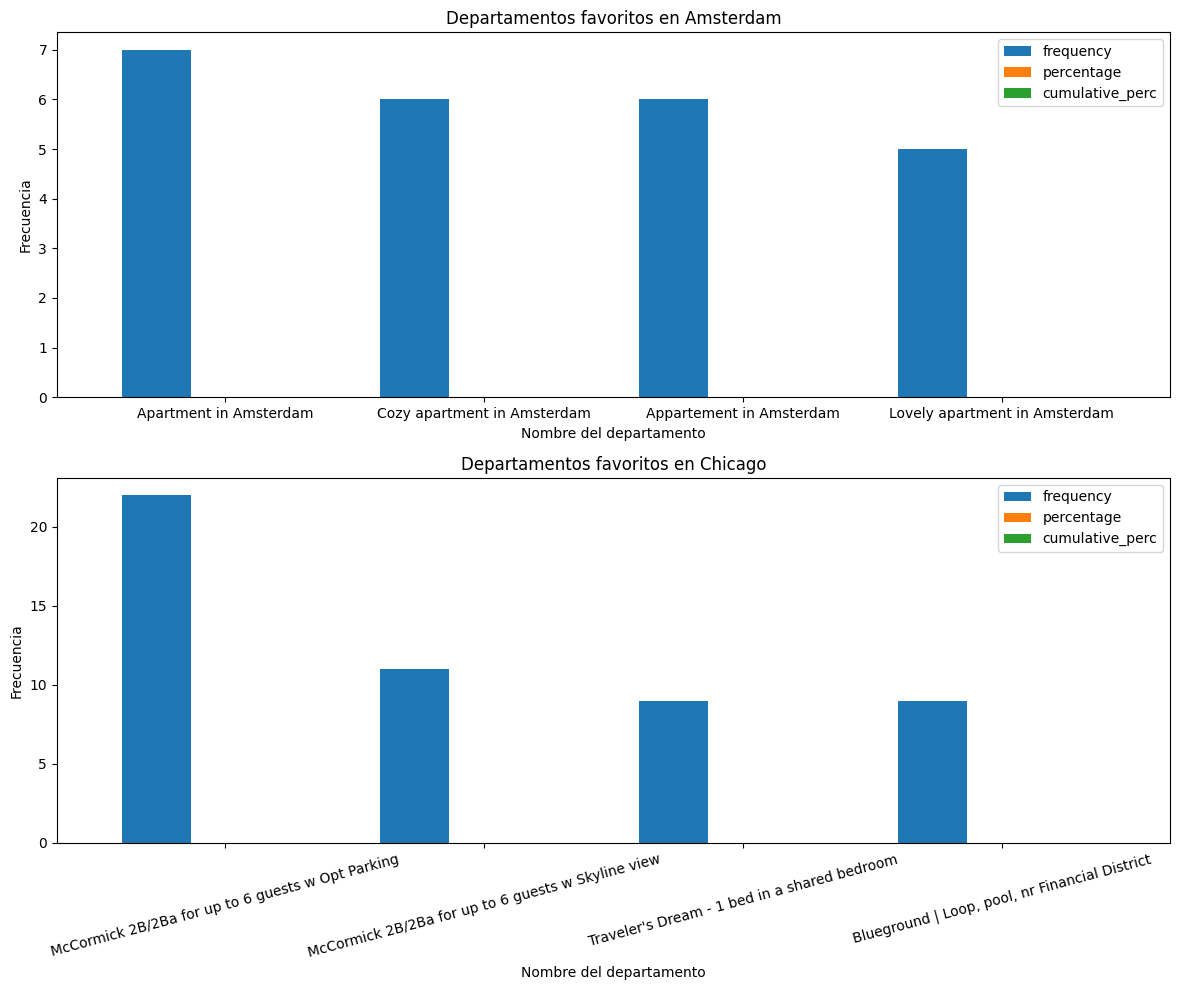

In [ ]:
# Create subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))  # 2 rows, 1 column

# Plot for Amsterdam
Filtro.plot(kind='bar', width=0.8, ax=ax1)
ax1.set_title('Departamentos favoritos en Amsterdam')
ax1.set_xlabel('Nombre del departamento')
ax1.set_ylabel('Frecuencia')
ax1.tick_params(axis='x', rotation=45)

# Plot for Chicago
Filtro_chicago.plot(kind='bar', width=0.8, ax=ax2)
ax2.set_title('Departamentos favoritos en Chicago')
ax2.set_xlabel('Nombre del departamento')
ax2.set_ylabel('Frecuencia')
ax2.tick_params(axis='x', rotation=45)

#Amsterdam
ax1.set_xticklabels(Filtro['name'], rotation=0, ha='center')

# Chicago
ax2.set_xticklabels(Filtro_chicago['name'], rotation=15, ha='center')

plt.tight_layout()
plt.show()


In [ ]:
table2 = freq_tbl(amsterdam_limpio['host_name'])
table2

,host_name,frequency,percentage,cumulative_perc
0,Peter,31,0.005983,0.005983
1,David,30,0.005790,0.011774
2,Mike,28,0.005404,0.017178
3,Maarten,25,0.004825,0.022003
4,Laura,24,0.004632,0.026636
...,...,...,...,...
2307,Jacquelien,1,0.000193,0.999228
2308,Katya,1,0.000193,0.999421
2309,Sietske,1,0.000193,0.999614
2310,Lidra,1,0.000193,0.999807


In [ ]:
Filtro2= table2[table2['frequency']>22]
Filtro2

,host_name,frequency,percentage,cumulative_perc
0,Peter,31,0.005983,0.005983
1,David,30,0.005790,0.011774
2,Mike,28,0.005404,0.017178
3,Maarten,25,0.004825,0.022003
4,Laura,24,0.004632,0.026636


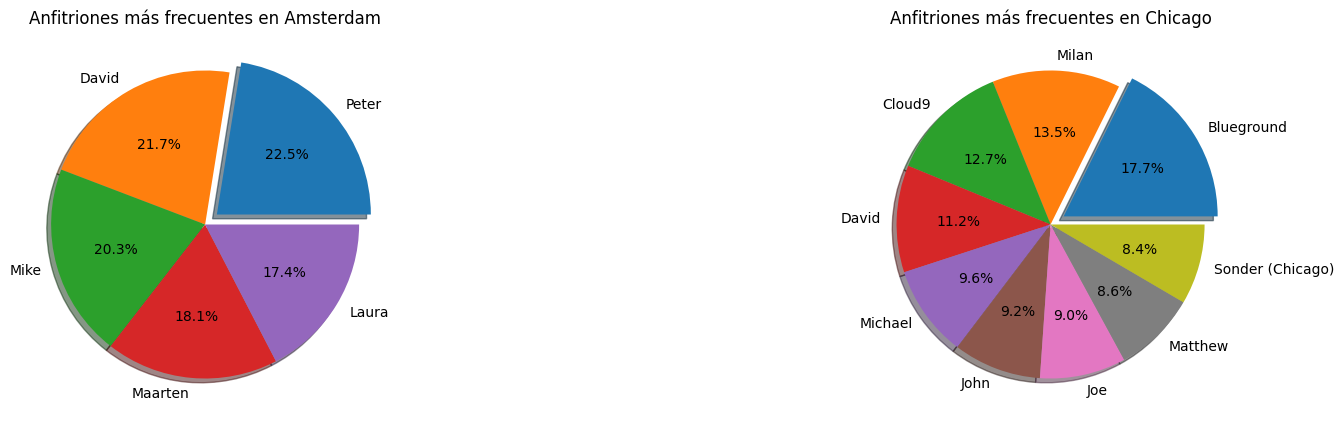

In [ ]:
# Datos para Amsterdam
table2 = freq_tbl(amsterdam_limpio['host_name'])
Filtro2= table2[table2['frequency']>22]

# Datos para Chicago
table2_chicago = freq_tbl(chicago_limpio['host_name'])
Filtro2_chicago = table2_chicago[table2_chicago['frequency'] > 40]

# Crear subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))  # 1 fila, 2 columnas

# Gráfico de pastel para Amsterdam
Filtro2.set_index('host_name')["frequency"].plot(kind='pie', autopct="%0.1f%%", explode=[0.1 if i == Filtro2['frequency'].idxmax() else 0 for i in range(len(Filtro2))], shadow=True, ax=ax1)
ax1.set_title('Anfitriones más frecuentes en Amsterdam')
ax1.set_ylabel('')

# Gráfico de pastel para Chicago
Filtro2_chicago.set_index('host_name')["frequency"].plot(kind='pie', autopct="%0.1f%%", explode=[0.1 if i == Filtro2_chicago['frequency'].idxmax() else 0 for i in range(len(Filtro2_chicago))], shadow=True, ax=ax2)
ax2.set_title('Anfitriones más frecuentes en Chicago')
ax2.set_ylabel('')

plt.show()

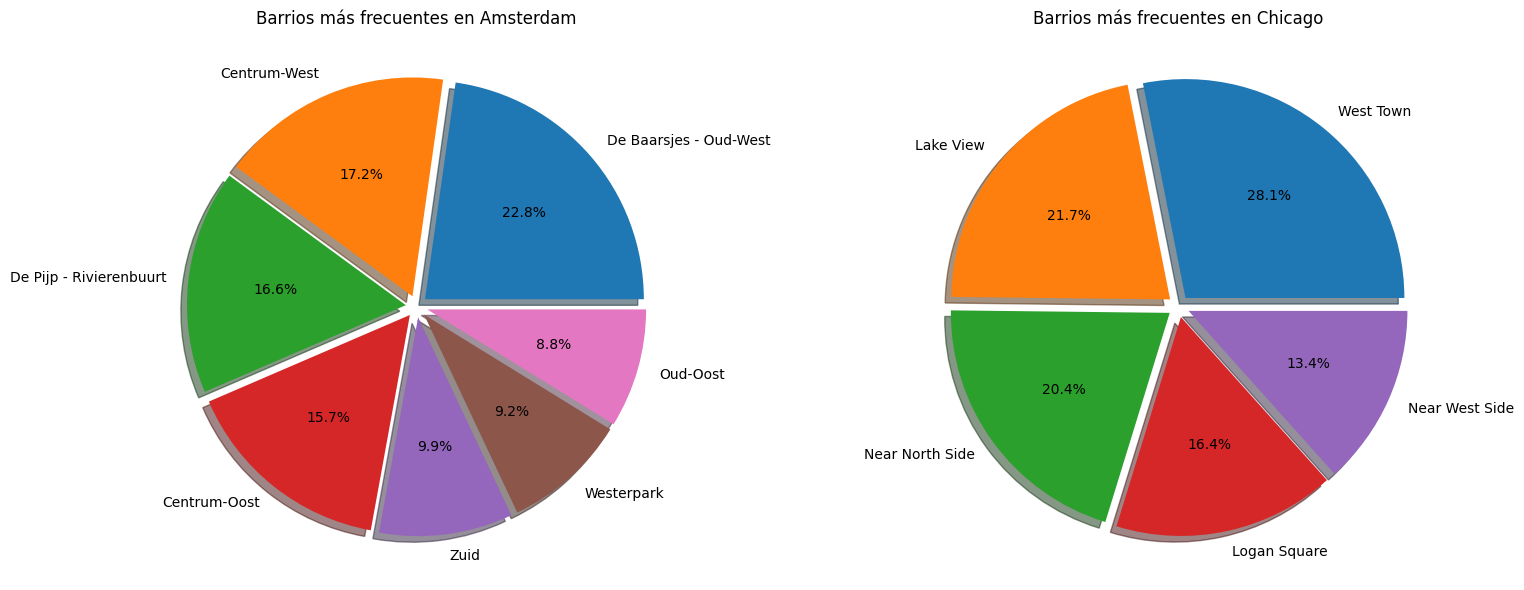

In [ ]:
# Tabla de frecuencias para Amsterdam
table3_amsterdam = freq_tbl(amsterdam_limpio['neighbourhood'])
# Filtrar los barrios más frecuentes (ajusta el umbral según sea necesario)
Filtro3_amsterdam = table3_amsterdam[table3_amsterdam['frequency'] > 250]

# Tabla de frecuencias para Chicago
table3_chicago = freq_tbl(chicago_limpio['neighbourhood'])
# Filtrar los barrios más frecuentes (ajusta el umbral según sea necesario)
Filtro3_chicago = table3_chicago[table3_chicago['frequency'] > 250]

# Crear subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Gráfico de pastel para Amsterdam
Filtro3_amsterdam.set_index('neighbourhood')["frequency"].plot(kind='pie', autopct="%0.1f%%",
                                                                explode=[0.05]*len(Filtro3_amsterdam),
                                                                shadow=True, ax=ax1)
ax1.set_title('Barrios más frecuentes en Amsterdam')
ax1.set_ylabel('')

# Gráfico de pastel para Chicago
Filtro3_chicago.set_index('neighbourhood')["frequency"].plot(kind='pie', autopct="%0.1f%%",
                                                              explode=[0.05]*len(Filtro3_chicago),
                                                              shadow=True, ax=ax2)
ax2.set_title('Barrios más frecuentes en Chicago')
ax2.set_ylabel('')

plt.tight_layout()
plt.show()

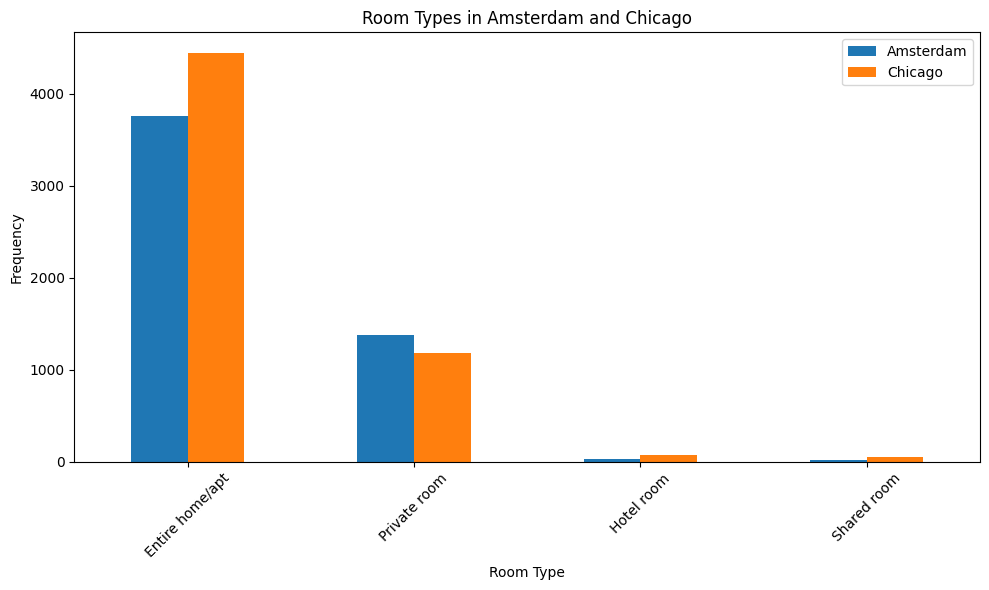

In [ ]:
# Calculate frequencies for each room type in Amsterdam
amsterdam_room_counts = amsterdam_limpio['room_type'].value_counts()

# Calculate frequencies for each room type in Chicago
chicago_room_counts = chicago_limpio['room_type'].value_counts()

# Combine the data
all_room_counts = pd.concat([amsterdam_room_counts, chicago_room_counts], axis=1)
all_room_counts.columns = ['Amsterdam', 'Chicago']

# Plot the combined data
all_room_counts.plot(kind='bar', figsize=(10, 6))
plt.title('Room Types in Amsterdam and Chicago')
plt.xlabel('Room Type')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

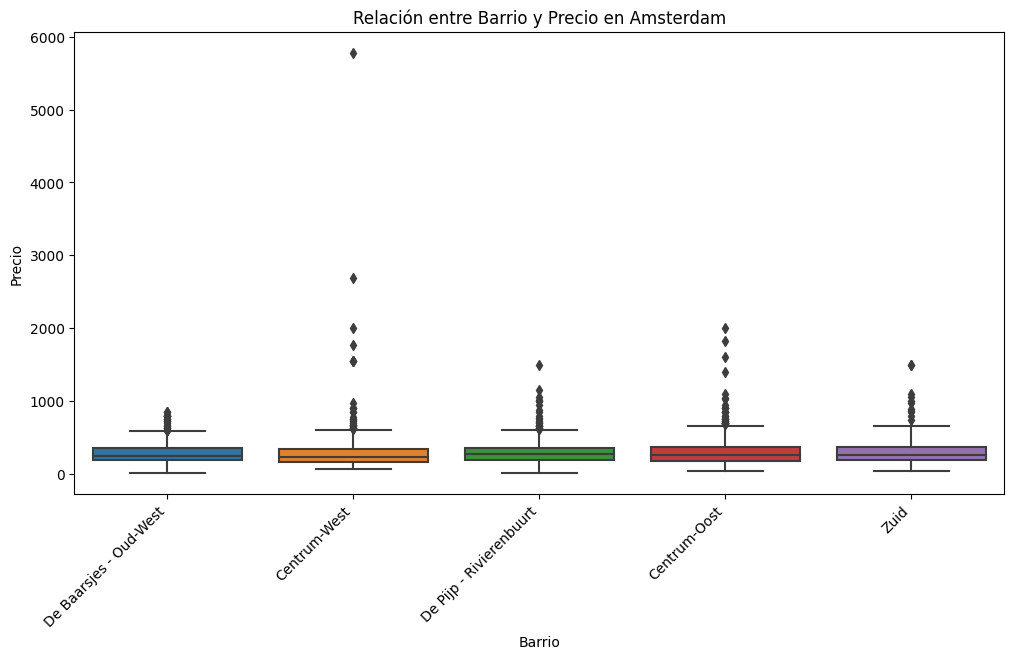

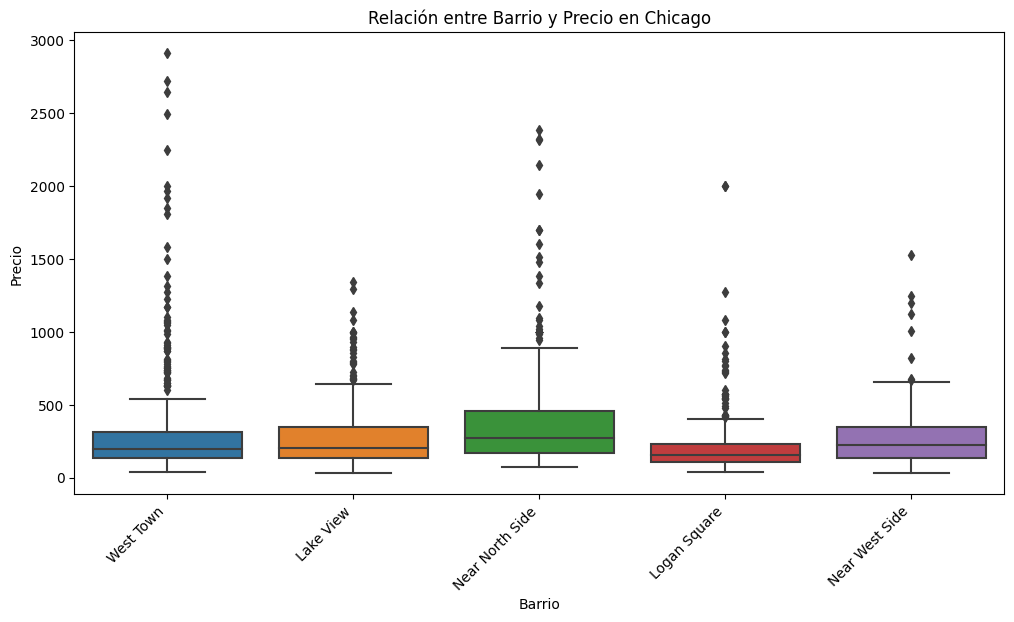

In [ ]:
import seaborn as sns  # Importamos seaborn para crear los boxplots

# Gráfico de caja para Amsterdam
plt.figure(figsize=(12, 6))
sns.boxplot(x='neighbourhood', y='price', data=amsterdam_limpio, order=amsterdam_limpio['neighbourhood'].value_counts().nlargest(5).index)
plt.title('Relación entre Barrio y Precio en Amsterdam')
plt.xlabel('Barrio')
plt.ylabel('Precio')
plt.xticks(rotation=45, ha='right')
plt.show()

# Gráfico de caja para Chicago
plt.figure(figsize=(12, 6))
sns.boxplot(x='neighbourhood', y='price', data=chicago_limpio, order=chicago_limpio['neighbourhood'].value_counts().nlargest(5).index)
plt.title('Relación entre Barrio y Precio en Chicago')
plt.xlabel('Barrio')
plt.ylabel('Precio')
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
# Calcular la popularidad de cada barrio en Amsterdam
neighbourhood_popularity_amsterdam = amsterdam_limpio['neighbourhood'].value_counts()

# Crear un diccionario que mapea barrio a popularidad
popularity_dict_amsterdam = neighbourhood_popularity_amsterdam.to_dict()

# Agregar una columna 'popularity' al DataFrame de Amsterdam
amsterdam_limpio['popularity'] = amsterdam_limpio['neighbourhood'].map(popularity_dict_amsterdam)

# Calcular la correlación entre precio y popularidad en Amsterdam
correlation_amsterdam = amsterdam_limpio['price'].corr(amsterdam_limpio['popularity'])
print("Correlación entre precio y popularidad del barrio en Amsterdam:", correlation_amsterdam)

# Repetir el proceso para Chicago
neighbourhood_popularity_chicago = chicago_limpio['neighbourhood'].value_counts()
popularity_dict_chicago = neighbourhood_popularity_chicago.to_dict()
chicago_limpio['popularity'] = chicago_limpio['neighbourhood'].map(popularity_dict_chicago)
correlation_chicago = chicago_limpio['price'].corr(chicago_limpio['popularity'])
print("Correlación entre precio y popularidad del barrio en Chicago:", correlation_chicago)

Correlación entre precio y popularidad del barrio en Amsterdam: 0.1317379138691396
Correlación entre precio y popularidad del barrio en Chicago: 0.26775228516877636
